In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration globale pour l'affichage pandas
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)  # Optionnel : limite le nombre de lignes affichées


In [51]:
data=pd.read_csv("C:/Users/ABDILLAHIOMARDJAMA/Downloads/EDAPYTHON/RAW_interactions.csv")

Exploration initiale

In [52]:
##Aperçu des données
data.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!"
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunko. Everyone loved it.
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!"


In [53]:
##Affichage aleatoire de 10 lignes
data.sample(10)

,user_id,recipe_id,date,rating,review
810605,2314234,195571,2012-07-02,5,I used beluga lentils and left them a little firmer than the recipe recommended. I also used coconut milk instead of cream and butter to make it a vegan dish. It was beautiful and delicious served with coconut rice! I can't wait to make it again.
636158,281387,84764,2006-06-28,5,This is wonderful as is. I made it again using a can of chicken and crumbled bacon (real). I didn't have any peas...but it was still a favorite. I think I even liked the chicken better. Thanks for a keeper recipe.
866543,1055864,32204,2008-12-02,5,AWESOME!!!These are like the perfect brownies.Sometime I'm gonna try Ina Garten's brownies and see how they compare to these.:)
226340,1462970,251201,2011-05-10,5,"My husband came home with a bunch of fresh beets and carrots and I didn't know what to do with them. I NEVER would have thought I would like beets, but this was GREAT! I was a little confused on the directions...I guess you saute beets with carrots and onions. Also, I thought it was lacking in a little flavor so I added more garlic and ginger (I used water, so it may be better with broth instead). I pureed most of it, but left some chunks in for more texture."
28460,283390,57028,2006-12-03,5,"Simple and wholesome. This was a great soup to fix on the coldest day (thus far) this winter! I'll probably up the amount of cumin next time (I really love cumin); it's really good as is, too! Thanks."
774562,571134,13982,2007-12-23,5,"These were AMAZING! What a great flavor! I didn't have time for rice, so I served the fillets over a baby spinach salad and used the left over sauce as the dressing. What a KEEPER! Thanks for posting. I'll be making this one again."
1091090,58439,46571,2007-08-18,4,"Like the other reviewers the taste was terrific, true!\r\nI personally had to use more breadcrumbs and etc too!\r\nPerhaps chicken breasts are larger in Australia, you never know!\r\nI would recommend this recipe and that you have a go!\r\nCheers!"
315074,135470,241242,2018-08-21,5,"This dish was beautiful, flavorful and delicious. I thought lettuce and green beans were odd to combine but I really enjoyed them together. The salsa was so good the sweetness of the balsamic was a nice balance to the onion. I greatly reduced the red pepper and added more black pepper. My husband loved it as leftovers too!"
805890,428885,249345,2007-09-03,5,"THIS was incredible! We had a few friends over for a nice September evening last night. I had extra clams left over from a clam bake a couple of days ago, so these were already steamed. I threw them in the light balsamic vinaigrette salad dressing prior to heating up the sauce to give them even more flavor. I loved the spinach, the dry wine added just such a nice background taste that was delicate and molded perfectly with the sauce. Thank you so much Auntie Mags for a winner and an easy winner at that! Will make tons of times!"
106343,2001959837,339905,2018-01-28,5,This was the best bread I've ever made in my bread machine! So yummy. It's a no-fail recipe. I've made 2 loaves so far. Easy to follow directions. Made just like the recipe called for. Perfect! Thank you!


In [54]:
##Structure des données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [55]:
##la taille des données
nombre_de_lignes, nombre_de_colonnes = data.shape
print(f"le nombre de lignes est : {nombre_de_lignes}")
print(f"le nombre de colonnes est : {nombre_de_colonnes}")

le nombre de lignes est : 1132367
le nombre de colonnes est : 5


Nous disposons un dataset contenant 113236 observations et 5 variables decrivatnt les interactions des utilisateurs avec le recettes de cuisines,et ci-dessous la description des variables:
- user_id : identifiant unique de l'utilisateur
 - recipe_id : identifiant unique de la recette
 - rating : note attribuée par l'utilisateur à la recette (échelle de 1 à 5)
 - date: date de l'interaction
 - review: commentaire textuel laissé par l'utilisateur sur la recette.

In [56]:
##Detection des nombres des valeurs manquantes par colonne
print(data.isnull().sum())


user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64


In [57]:
##Detection de pourcetage des valeurs manquantes par colonne
print(data.isna().mean()*100)

user_id      0.000000
recipe_id    0.000000
date         0.000000
rating       0.000000
review       0.014924
dtype: float64


In [58]:
##detection des pourcentages des valeurs manquantes du dataset
print(data.isna().mean().mean()*100)

0.0029848980056819035


In [59]:
##interpretation des valeurs manquantes:nous observons que la colonne review a 0,015% de valeurs manquantes.il est trop faible comme pourcentage et nous pouvons les ignorer,comme il s'agit des données textuelles liée a des avis des utilisatures sur les recettes,alors nous pouvons les imputer par des descriptions dependants des autres colonnes,comme le note de la recette

In [60]:
##affichage des lignes dont la note est superieur ou egale a 4 et la colonne review,afin de pouvoir voir comment les commentaire sont formulés.
data[data['rating']<4].sample(5)

,user_id,recipe_id,date,rating,review
435530,2002103071,431105,2018-04-28,0,did not see use SUGAR FREE MIX&gt; sorry
656730,559630,27208,2008-04-09,3,It was pretty good but really salty even for me and I love salt. I don't think I would call it to die for but really easy to put together.
731500,2550158,201234,2012-12-24,0,"Great recipe, I am not a cook but love to hunt. Found this one & with a few minor alterations my family loves it. Used Green Pepper, 1 Can of beans & replaced the water with beer. I also cooked up 4 strips of bacon & cut them into the chili with kitchen scissors! Thank you very much."
810589,419585,251131,2008-12-25,3,"We weren't bowled over by the taste of this soup: I think it was the orange juice. My son-in-law loved it, my husband took one taste and refused to eat any more of it. I didn't like it myself."
709257,296454,76864,2009-12-17,2,"all i'm getting with the dough is a gooey mass, it's rising but it's too runny, tryed making by hand and tryed bread machine, same results... yes followed the directions"


In [61]:
####Affichons les lignes qui ont des valeurs manquantes dans la colonne review.
data[data['review'].isnull()].sample(5)

,user_id,recipe_id,date,rating,review
583421,2001981645,393523,2018-02-09,5,NaN
1065402,2001475549,320682,2017-04-06,5,NaN
637733,2001352978,414266,2017-01-15,4,NaN
84776,2001583453,347996,2017-06-14,5,NaN
205063,2689825,495271,2013-02-12,5,NaN


In [62]:
###affiché les nombres des valeur manquantes de la colonne par ligne en fonction de la note
print(data[data['review'].isnull()]['rating'].value_counts())

rating
5    135
4     27
3      3
1      3
2      1
Name: count, dtype: int64


In [171]:
##Nous allons imputer les valeurs manquantes de la colonne review en fonction de la note(rating) de la recette.
def imputer_review(row):
    if pd.isnull(row['review']):
        if row['rating'] == 5:
            return "Excellent recipe! Loved it!"
        elif row['rating'] == 4:
            return "Great recipe, will make again."
        elif row['rating'] == 3:
            return "Good recipe, but could be improved."
        elif row['rating'] == 2:
            return "Not my favorite."
        elif row['rating'] == 1:
            return "Did not like this recipe at all."
    else:
        return row['review']



In [172]:
##Application de la fonction d'imputation
data['review'] = data.apply(imputer_review, axis=1)

# Vérifions les valeurs manquantes après l'imputation
print("Valeurs manquantes après imputation :")
print(data['review'].isnull().sum())

Valeurs manquantes après imputation :
0


C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_33068\3044346414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review'] = data.apply(imputer_review, axis=1)


In [173]:
# Créer une liste des commentaires imputés
commentaires_imputes = [
    "Excellent recipe! Loved it!",
    "Great recipe, will make again.",
    "Good recipe, but could be improved.",
    "Not my favorite.",
    "Did not like this recipe at all.",
]

# Créer la colonne indicatrice (1 = imputé, 0 = original)
data['review_imputed'] = data['review'].isin(commentaires_imputes).astype(int)

# Vérifier les résultats
print("Nombre de reviews par type :")
print(data['review_imputed'].value_counts())
print("\nPourcentage :")
print(data['review_imputed'].value_counts(normalize=True) * 100)

Nombre de reviews par type :
review_imputed
0    1071350
1        170
Name: count, dtype: int64

Pourcentage :
review_imputed
0    99.984135
1     0.015865
Name: proportion, dtype: float64


C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_33068\3759009846.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review_imputed'] = data['review'].isin(commentaires_imputes).astype(int)


In [66]:
##Affichons nombre total des donnée observé avant et après le traitement des valeurs manquantes
print(f"Nombre total de lignes dans le dataset après traitement des valeurs manquantes : {data.shape[0]}")


Nombre total de lignes dans le dataset après traitement des valeurs manquantes : 1132367


In [67]:
##Affichage des dataset aprés traitement des valeurs manquantes
data.head()

,user_id,recipe_id,date,rating,review,review_imputed
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.,0
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!",0
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!,0
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunko. Everyone loved it.,0
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!",0


In [68]:
###Detection des doublons
print(f"Nombre de doublons dans le dataset : {data.duplicated().sum()}")

Nombre de doublons dans le dataset : 0


In [69]:
##affichons les utilisateurs qui ont commenté plus d'une fois la même recette.
data[data.duplicated(subset=['user_id', 'recipe_id'], keep=False)]


,user_id,recipe_id,date,rating,review,review_imputed


Nous observons qu'il y'a pas de doublons.

In [70]:
##conversions des types de données
data['date']=pd.to_datetime(data['date'])
data['user_id']=data['user_id'].astype('category')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   user_id         1132367 non-null  category      
 1   recipe_id       1132367 non-null  int64         
 2   date            1132367 non-null  datetime64[ns]
 3   rating          1132367 non-null  int64         
 4   review          1132367 non-null  object        
 5   review_imputed  1132367 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(3), object(1)
memory usage: 57.3+ MB
None


In [108]:
###Verification si les données sont cohérentes et valides,affichon les lignes dont la note est inferieur a 3
data[data['rating'] <= 3].sample(5)

,user_id,recipe_id,date,rating,review,review_imputed
757381,134624,203695,2007-02-14,2,"I am sorry to say we just didn't enjoy this dish at all.\r\nThe only thing I could taste in this dish was the garlic, which seemed odd and out of place with a sweet potato.\r\nI would have liked some of the coconut milk flavor to come through here.\r\nI believe if I make this again, the garlic and thyme will be omitted and the allspice will be increased to 1 tsp.",0
817885,1471923,4417,2012-09-03,0,I made with cinnamon raisin bread and it was great! I topped with vanilla bean ice cream! Yum!,0
198777,821430,9430,2009-08-11,0,The flavor of the sauce was quite delicious- I had to make a few subs as I didn't have any tomato sauce. Used beef broth and tomato paste instead. For some reason the meat just didn't turn out for me. It was incredibly tough. I'm not quite sure what I did wrong. I had 2 round steaks and simmered them for almost 2 hours. They were inedible for some reason- like hockey pucks! I will try this again but with another cut of meat- it was my first time using eye of round steaks and I don't think I'll be getting them again. (unfortunately as they are so cheap!),0
360844,319854,95416,2008-08-08,3,"Tastes great, but I got fluffy frosting both times I tried this recipe. Fluffy, as in: lots of air pockets and not smooth frosting. Perhaps tripling the recipe would work? I don't know. I have two more shhetcakes to ice and am moving on to a new recipe before I get to the main cake.",0
556295,2533356,21882,2015-10-07,1,Canned mushrooms? They can&#039;t make anything taste good! I made recipe with a few adjustments. Fresh pesto and fresh mushrooms. Was ok but found the crumbs got soggy and unpleasant. I think I would skip crumbs altogether.,0


nous observons que plusieurs lignes du jeu de données présentent une note égale à 0 (rating = 0), tout en contenant un commentaire textuel (review) souvent positif ou négatif.
Cette situation est incohérente : une note de 0 ne correspond pas à une appréciation valide sur une échelle de 1 à 5, et le contenu des commentaires indique que les utilisateurs ont bien exprimé une opinion sur la recette.

Nous en déduisons que la valeur 0 ne traduit pas une mauvaise note, mais plutôt l’absence de note — autrement dit, une valeur manquante codée par 0.

En conséquence, nous considérons toutes les notes égales à 0 comme valeurs manquantes et nous les remplaçons par NaN afin de ne pas biaiser les statistiques descriptives ni les calculs de moyennes.
Cela revient à interpréter ces cas comme des utilisateurs ayant laissé un commentaire sans attribuer de note chiffrée.

In [155]:
##remplacons les notes invalides par NaN
data.loc[data['rating'] == 0, 'rating'] = np.nan

In [156]:
##verifions les valeurs manquantes après le remplacement
print(data['rating'].isnull().sum())

60847


Analyse descriptive

In [159]:
##Nous allons commencer a etudié d'abord comment la note(rating) valide est distribuée dans le dataset.
data=data[data['rating'].notna()]

In [161]:
data['rating'].describe()

count    1.071520e+06
mean     4.661499e+00
std      7.230534e-01
min      1.000000e+00
25%      5.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [162]:
data['rating'].value_counts(normalize=True)*100

rating
5.0    76.187472
4.0    17.485441
3.0     3.812808
2.0     1.318034
1.0     1.196245
Name: proportion, dtype: float64

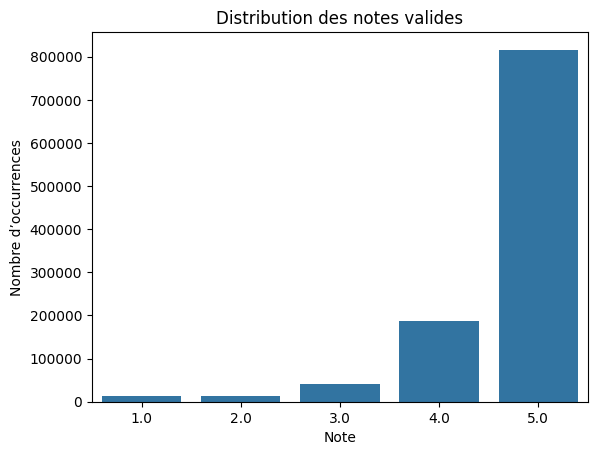

In [164]:
sns.countplot(x='rating', data=data)
plt.title("Distribution des notes valides")
plt.xlabel("Note")
plt.ylabel("Nombre d’occurrences")
plt.show()

L’analyse univariée de la variable rating met en évidence une forte concentration des évaluations sur les valeurs hautes de l’échelle (4 et 5).
Ce biais positif traduit une satisfaction générale élevée sur la plateforme, mais il indique aussi que la variable rating n’est pas symétriquement distribuée.

In [165]:
###Calculons le nombre totale d interactions par utilisateur
interactions_user = data['user_id'].value_counts()
interactions_user.describe()

count    226570.000000
mean          4.729311
std          49.084643
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        7665.000000
Name: count, dtype: float64

In [168]:
##Etudions maintenant la variable userid en determinons le top 10 des utilisateurs qui ont le plus interagi avec les recettes en fonction du nombre d'avis laissés.
top_users = data['user_id'].value_counts().sample(10)
print(top_users)


user_id
663071         1
923163         3
1837662        3
2001662210     0
2000852030     1
1423329        1
313014        71
1610880        2
1238688        1
776692         1
Name: count, dtype: int64


Text(0.5, 0, 'User ID')

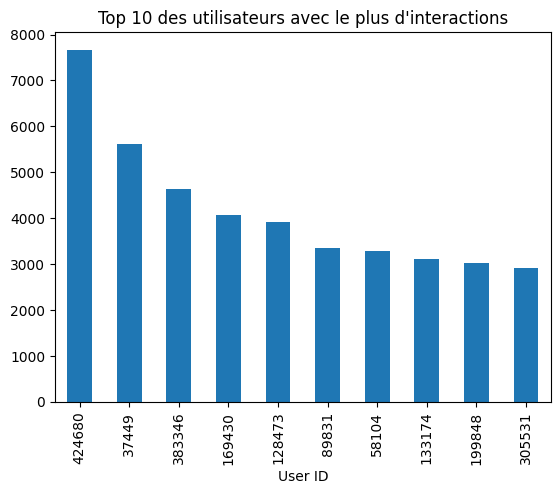

In [76]:
data['user_id'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 des utilisateurs avec le plus d\'interactions')
plt.xlabel('User ID')

In [88]:
##Calculons la proportion des utilisateurs qui ont laissé moins de 2 avis
proportion_moins_de_2_avis = (data['user_id'].value_counts() < 2).mean() * 100
print(f"Proportion des utilisateurs ayant laissé moins de 2 avis : {proportion_moins_de_2_avis:.2f}%")

Proportion des utilisateurs ayant laissé moins de 2 avis : 73.38%


analyse de la variable UserID met en évidence une forte disparité d’activité sur la plateforme :

- 73,38 % des utilisateurs n’ont laissé qu’un seul avis, ce qui traduit un comportement ponctuel.
- Une minorité d’utilisateurs hyperactifs contribue à une part importante des évaluations (jusqu’à 7 671 avis pour le plus actif).

En conséquence, les analyses globales (par exemple la moyenne des notes) peuvent être biaisées par la surreprésentation des utilisateurs les plus actifs.

Il est donc crucial, dans la suite de l’étude, d’examiner le lien entre le niveau d’activité UserID et les notes attribuées Rating afin de vérifier si ces utilisateurs très actifs sont également ceux qui attribuent systématiquement les notes les plus élevées.

In [169]:
##
data.groupby('user_id')['rating'].mean().describe()

C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_33068\2131936807.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('user_id')['rating'].mean().describe()


count    196098.000000
mean          4.557734
std           0.900728
min           1.000000
25%           4.500000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_33068\4001221394.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('user_id')['rating'].mean().hist(bins=30, rwidth=0.9)


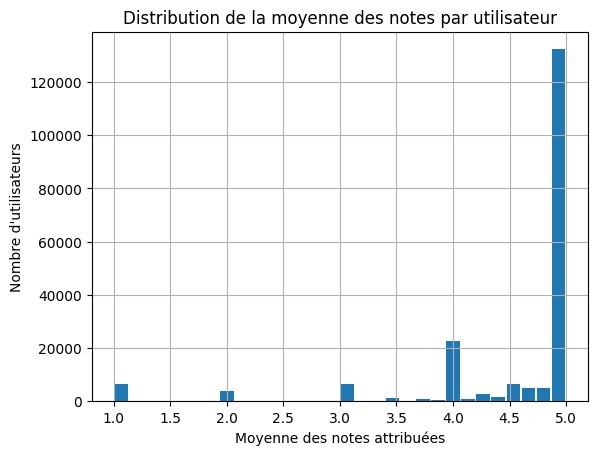

In [170]:
data.groupby('user_id')['rating'].mean().hist(bins=30, rwidth=0.9)
plt.title("Distribution de la moyenne des notes par utilisateur")
plt.xlabel("Moyenne des notes attribuées")
plt.ylabel("Nombre d'utilisateurs")
plt.show()

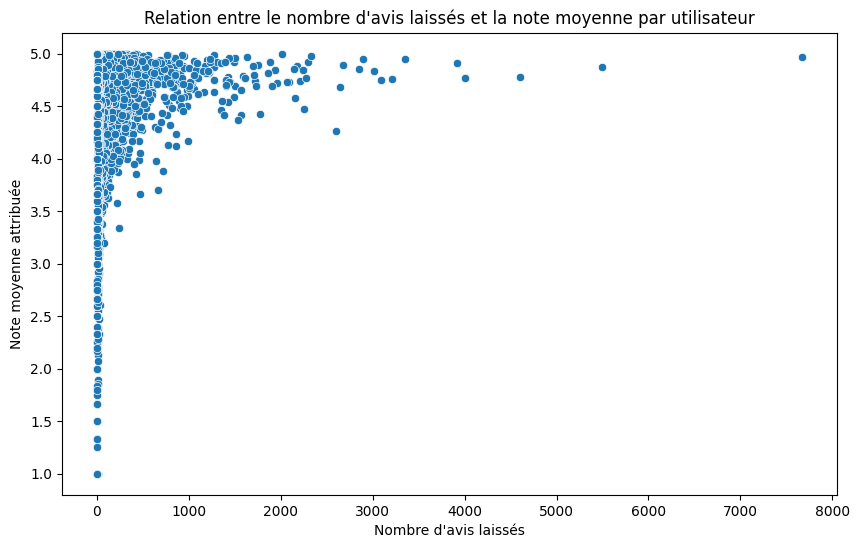

In [178]:
##relation entre le nombre d'avis laissés et la note moyenne attribuée par utilisateur
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['user_id'].value_counts(), y=data.groupby('user_id', observed=True)['rating'].mean())
plt.title("Relation entre le nombre d'avis laissés et la note moyenne par utilisateur")
plt.xlabel("Nombre d'avis laissés")
plt.ylabel("Note moyenne attribuée")
plt.show()

In [177]:
##calculons la corrélation entre le nombre d'avis laissés et la note moyenne attribuée par utilisateur
correlation = data['user_id'].value_counts().corr(data.groupby('user_id', observed=True)['rating'].mean())
print(f"Corrélation entre le nombre d'avis laissés et la note moyenne attribuée par utilisateur : {correlation:.2f}")


Corrélation entre le nombre d'avis laissés et la note moyenne attribuée par utilisateur : 0.01


In [183]:
##le percentiles jusqu'à 99% des interactions par utilisateur,et regardons apres par au notes moyennes au recettes afin de voir si les utilisateurs qui laissent le plus d'avis ont tendance a donner des notes plus élevées ou plus basses.
data['user_id'].value_counts().describe(percentiles=[.25, .5, .75, .95, .99])


count    226570.000000
mean          4.729311
std          49.084643
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
95%          10.000000
99%          59.000000
max        7665.000000
Name: count, dtype: float64

In [184]:
bins = [0, 1, 10, 60, float('inf')]
labels = ['Faible', 'Modérée', 'Haute', 'Extrême']
data['interaction_level'] = pd.cut(data['user_id'].map(data['user_id'].value_counts()), bins=bins, labels=labels)
data['interaction_level'].value_counts(normalize=True) * 100

interaction_level
Extrême    52.954495
Haute      18.980047
Modérée    14.970229
Faible     13.095229
Name: proportion, dtype: float64

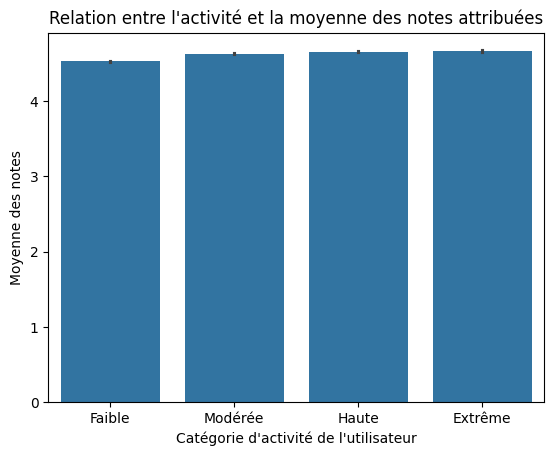

In [186]:
user_stats = data.groupby('user_id', observed=True).agg({'rating': 'mean', 'interaction_level': 'first'}).reset_index()
user_stats.rename(columns={'rating': 'note_moyenne'}, inplace=True)
sns.barplot(x='interaction_level', y='note_moyenne', data=user_stats, order=labels)
plt.title("Relation entre l'activité et la moyenne des notes attribuées")
plt.xlabel("Catégorie d'activité de l'utilisateur")
plt.ylabel("Moyenne des notes")
plt.show()


Les résultats montrent une distribution très homogène des notes :
quelle que soit la fréquence d’interaction d’un utilisateur, la moyenne des notes reste globalement stable, autour de 4.5 à 4.7.
Aucune tendance claire (ni croissante ni décroissante) n’apparaît entre le nombre d’avis laissés et la sévérité des notes attribuées.